<a href="https://colab.research.google.com/github/petermesy/Machine-Learning-ML/blob/main/Compare_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is the Pima Indians onset of diabetes problem. The problem has two classes and
 eight numeric input variables of varying scales. The 10-fold cross validation procedure is used to
 evaluate each algorithm, importantly con gured with the same random seed to ensure that the
 same splits to the training data are performed and that each algorithm is evaluated in precisely
 the same way.

In [9]:
 # Compare Algorithms
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
filname='/content/indian.csv'
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
dataframe=pd.read_csv(filname,names=names)
dataframe=dataframe.apply(pd.to_numeric,errors='coerce')
dataframe=dataframe.dropna()
array=dataframe.values
X=array[:,0:8]
Y=array[:,8]

  prepare models


In [11]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.778640 (0.047350)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.683732 (0.056570)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


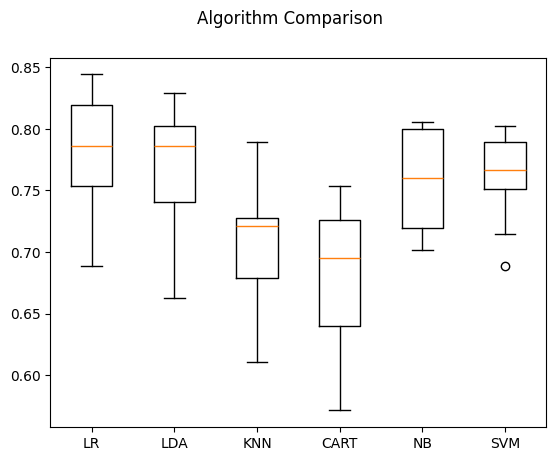

In [12]:
fig=pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()